<a href="https://colab.research.google.com/github/Angelaruiga/python_/blob/main/Predicci%C3%B3n_Publicaciones_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Carga de datos

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos históricos
data = {
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Publications": [330, 355, 426, 407, 424]
}

# Crear DataFrame
df = pd.DataFrame(data)



# 1. Regresión Lineal

In [44]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparar los datos para el modelo
X = df['Year'].values.reshape(-1, 1)
y = df['Publications'].values

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X, y)

# Predecir para 2024
year_2024 = np.array([[2024]])
predicted_publications_2024_lineal = model.predict(year_2024)

predicted_publications_2024_lineal

array([460.4])

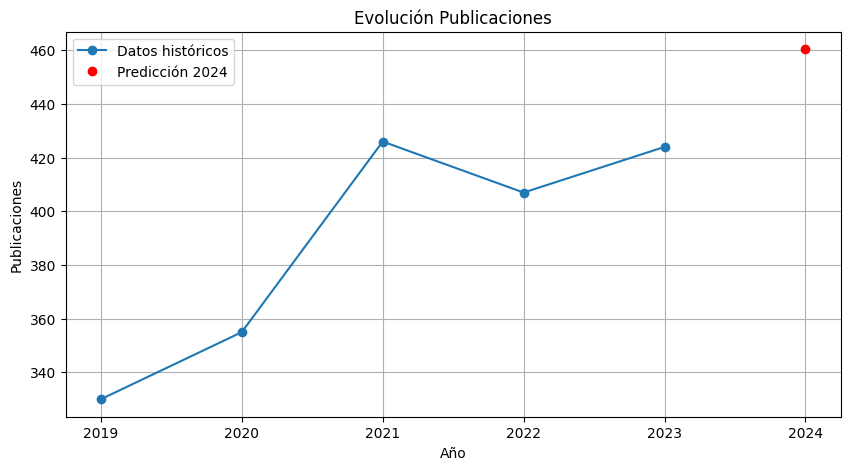

In [45]:

# Crear una lista extendida de años y publicaciones para incluir la predicción
years_extended = df['Year'].tolist() + [2024]
publications_extended = df['Publications'].tolist() + [predicted_publications_2024_lineal]

# Generar el gráfico
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Publications'], marker='o', linestyle='-', label='Datos históricos')
plt.plot(2024, predicted_publications_2024_lineal, 'ro', label='Predicción 2024')
plt.title('Evolución Publicaciones')
plt.xlabel('Año')
plt.ylabel('Publicaciones')
plt.legend()
plt.grid(True)
plt.xticks(years_extended)
plt.show()

# 2. Suavizamiento Exponencial

Suavizamiento Exponencial

El suavizamiento exponencial se calcula iterativamente usando una fórmula que da más peso a los valores más recientes.
Fórmula

St=αYt+(1−α)St−1

Para simplificar, usaremos α=0.5α=0.5.
Cálculos Iterativos

Asumimos que S0=Y0​ (la primera observación).


> S1=0.5×355+0.5×330=342.5

> S2=0.5×426+0.5×342.5=384.25

> S3=0.5×407+0.5×384.25=395.625

> S4=0.5×424+0.5×395.625=409.8125


Predicción para 2024

Usamos S4​ para predecir S5​ (2024):

>S5=0.5×424+0.5×409.8125=416.90625




In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# 'ewm' es una función de Pandas que crea un objeto de media móvil exponencialmente ponderada
# 'mean()' calcula la media basada en ese objeto
# df['Smoothed'] es la columna que hemos creado previamente para almacenar los valores suavizados.

alpha = 0.5
df['Smoothed'] = df['Publications'].ewm(alpha=0.5, adjust=False).mean()
predicted_publications_exp_smooth = alpha * df['Publications'].iloc[-1] + (1 - alpha) * df['Smoothed'].iloc[-1]

# df['Publications'].iloc[-1] selecciona el último valor de esta columna. En este caso, selecciona el valor de publicaciones del año 2023, que es 424.

#df['Smoothed'].iloc[-1] selecciona el último valor de esta columna. Este es el valor suavizado calculado para el año 2023, 409

#calculo manual: predicted_publications_exp_smooth=0.5×424 +(1−0.5)×409.8125


predicted_publications_exp_smooth

416.90625

In [38]:
df['Smoothed']

0    330.0000
1    342.5000
2    384.2500
3    395.6250
4    409.8125
Name: Smoothed, dtype: float64

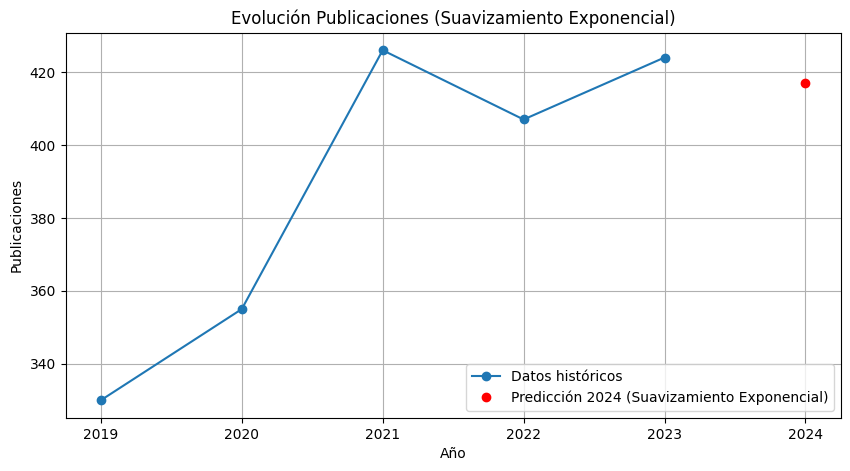

416.90625


In [47]:

plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Publications'], marker='o', linestyle='-', label='Datos históricos')
plt.plot(2024, predicted_publications_exp_smooth, 'ro', label='Predicción 2024 (Suavizamiento Exponencial)')
plt.title('Evolución Publicaciones (Suavizamiento Exponencial)')
plt.xlabel('Año')
plt.ylabel('Publicaciones')
plt.legend()
plt.grid(True)
plt.xticks(years_extended)
plt.show()

print(predicted_publications_exp_smooth)


# 3. Media Móvil

Media Móvil

La media móvil se calcula promediando los últimos 3 años:

Media Movil= (Y2021+Y2022+Y2023 )/3


In [40]:
# Calcular la media móvil de los últimos 3 años
predicted_publications_moving_avg = df['Publications'].rolling(window=3).mean().iloc[-1]
print(predicted_publications_moving_avg)


419.0


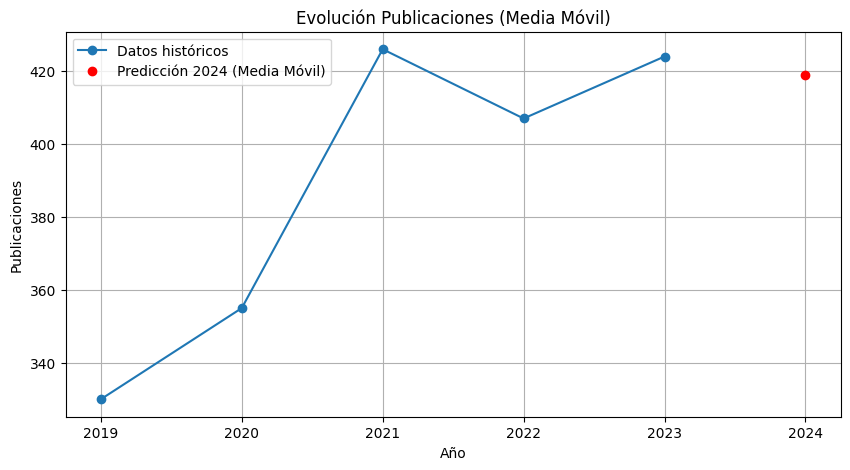

In [41]:
# Crear una lista extendida de años y publicaciones para incluir la predicción
years_extended = df['Year'].tolist() + [2024]
publications_extended = df['Publications'].tolist() + [predicted_publications_moving_avg]

# Generar el gráfico
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Publications'], marker='o', linestyle='-', label='Datos históricos')
plt.plot(2024, predicted_publications_moving_avg, 'ro', label='Predicción 2024 (Media Móvil)')
plt.title('Evolución Publicaciones (Media Móvil)')
plt.xlabel('Año')
plt.ylabel('Publicaciones')
plt.legend()
plt.grid(True)
plt.xticks(years_extended)
plt.show()

# 4.Combinación entres las tres predicciones

Combinación de Modelos

Para la combinación de modelos, tomamos el promedio de las tres predicciones:

Prediccion Combinada= (Regresisón Líneal +Regresión Polinomial+Media Moóvil)/3


In [48]:
# Combinación de las predicciones de los tres métodos
pred_combined = (predicted_publications_2024_lineal + predicted_publications_exp_smooth + predicted_publications_moving_avg) / 3
print(pred_combined)


[432.10208333]


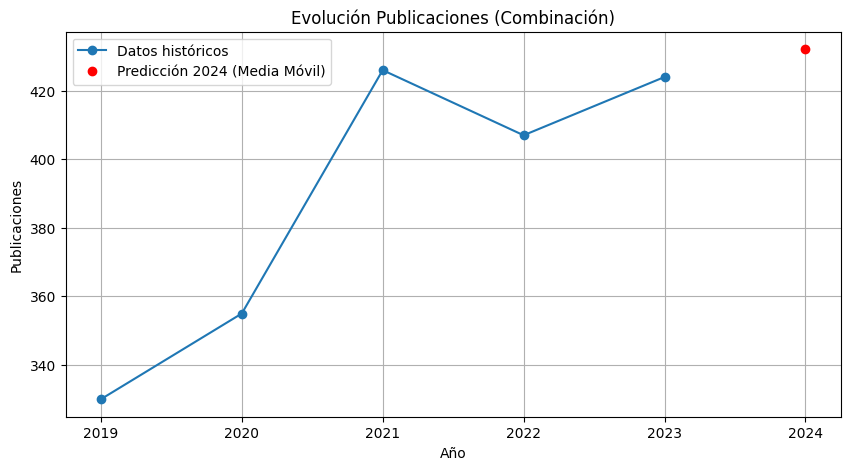

In [49]:
# Crear una lista extendida de años y publicaciones para incluir la predicción
years_extended = df['Year'].tolist() + [2024]
publications_extended = df['Publications'].tolist() + [pred_combined]

# Generar el gráfico
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Publications'], marker='o', linestyle='-', label='Datos históricos')
plt.plot(2024, pred_combined, 'ro', label='Predicción 2024 (Media Móvil)')
plt.title('Evolución Publicaciones (Combinación)')
plt.xlabel('Año')
plt.ylabel('Publicaciones')
plt.legend()
plt.grid(True)
plt.xticks(years_extended)
plt.show()